In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

## Part 1: EDA

In [2]:
gtd = pd.read_excel('GTD.xlsx')

In [3]:
gtd.head()

,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,...,propextent,ishostkid,nhostkid,nhostkidus,nhours,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1970,0,0,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,...,NaN,0.0,NaN,NaN,NaN,0,0,0,0,NaN
1,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,...,NaN,1.0,1.0,0.0,NaN,0,1,1,1,NaN
2,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,...,NaN,0.0,NaN,NaN,NaN,-9,-9,1,1,NaN
3,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,...,NaN,0.0,NaN,NaN,NaN,-9,-9,1,1,NaN
4,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,...,NaN,0.0,NaN,NaN,NaN,-9,-9,1,1,NaN


In [4]:
gtd.region.value_counts()

10    40422
6     37841
3     18628
8     16020
11    13434
5     10360
2     10337
9      4892
1      3268
4       786
7       538
12      246
Name: region, dtype: int64

In [5]:
gtd = gtd.rename(columns={'iyear':'year', 'imonth':'month', 'iday':'day'})

In [6]:
#Get rid of zeroes in month and day
gtd = gtd[gtd.month != 0]

In [7]:
gtd = gtd[gtd.day != 0] 

In [8]:
gtd.columns

Index([            u'year',            u'month',              u'day',
             u'approxdate',         u'extended',       u'resolution',
                u'country',      u'country_txt',           u'region',
             u'region_txt',        u'provstate',             u'city',
               u'latitude',        u'longitude',      u'specificity',
               u'vicinity',         u'location',            u'crit1',
                  u'crit2',            u'crit3',        u'doubtterr',
            u'alternative',         u'multiple',          u'success',
                u'suicide',      u'attacktype1',  u'attacktype1_txt',
              u'targtype1',    u'targtype1_txt',     u'targsubtype1',
       u'targsubtype1_txt',            u'corp1',          u'target1',
                u'natlty1',      u'natlty1_txt',            u'gname',
                u'ingroup',           u'motive',      u'guncertain1',
            u'guncertain2',           u'nperps',         u'nperpcap',
                u'cl

In [9]:
gtd.isnull().sum()

year                     0
month                    0
day                      0
approxdate          151387
extended                 0
resolution          152449
country                  0
country_txt              0
region                   0
region_txt               0
provstate            14404
city                   443
latitude              4430
longitude             4430
specificity              0
vicinity                 0
location            113862
crit1                    0
crit2                    0
crit3                    0
doubtterr                1
alternative         131749
multiple                 0
success                  0
suicide                  0
attacktype1              0
attacktype1_txt          0
targtype1                0
targtype1_txt            0
targsubtype1          8093
                     ...  
ingroup                  0
motive              109574
guncertain1            378
guncertain2         154722
nperps               70538
nperpcap             68896
c

In [10]:
gtd.attacktype1.value_counts()

3    75638
2    37433
1    17460
6     8971
7     8768
9     5407
5      829
8      820
4      552
Name: attacktype1, dtype: int64

In [11]:
gtd.city.value_counts()

Unknown                               8583
Baghdad                               6230
Karachi                               2525
Lima                                  2355
Belfast                               2100
Santiago                              1608
Mosul                                 1551
San Salvador                          1535
Mogadishu                             1161
Istanbul                               984
Bogota                                 964
Athens                                 962
Beirut                                 903
Kirkuk                                 851
Medellin                               844
Guatemala City                         748
Peshawar                               736
Benghazi                               707
Baqubah                                698
Quetta                                 689
Srinagar                               615
Paris                                  590
Jerusalem                              569
Kabul      

In [12]:
gtd.region_txt.value_counts()

Middle East & North Africa     40265
South Asia                     37733
South America                  18488
Western Europe                 15830
Sub-Saharan Africa             13334
Southeast Asia                 10313
Central America & Caribbean    10251
Eastern Europe                  4884
North America                   3228
East Asia                        774
Central Asia                     537
Australasia & Oceania            241
Name: region_txt, dtype: int64

In [13]:
# 1. Assassination
# 2. Armed assault 
# 3. Bombing/explosion
# 4. Hijacking
# 5. Hostage Tacking (barricade incident)
# 6. Hostage Taking (kidnapping)
# 7. Facility/infrastructure attack
# 8. Unarmed assault 
# 9. Unkown

In [14]:
me_attks = gtd[gtd.region_txt=='Middle East & North Africa']

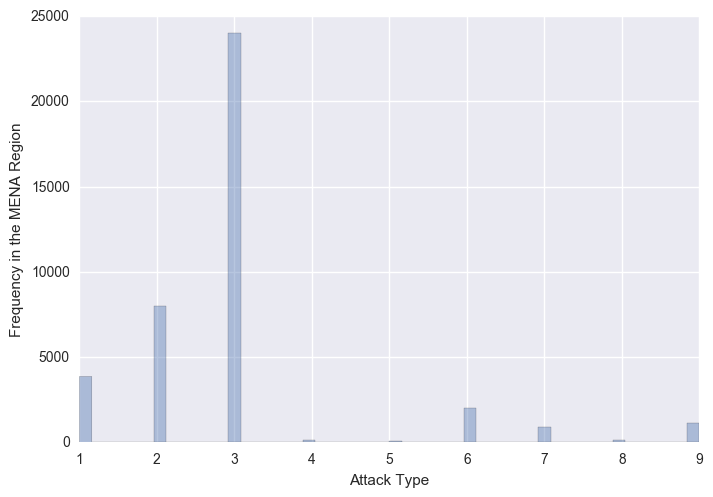

In [15]:
ax = sns.distplot(me_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency in the MENA Region')
plt.show()

In [16]:
s_am_attks = gtd[gtd.region_txt=='South America']

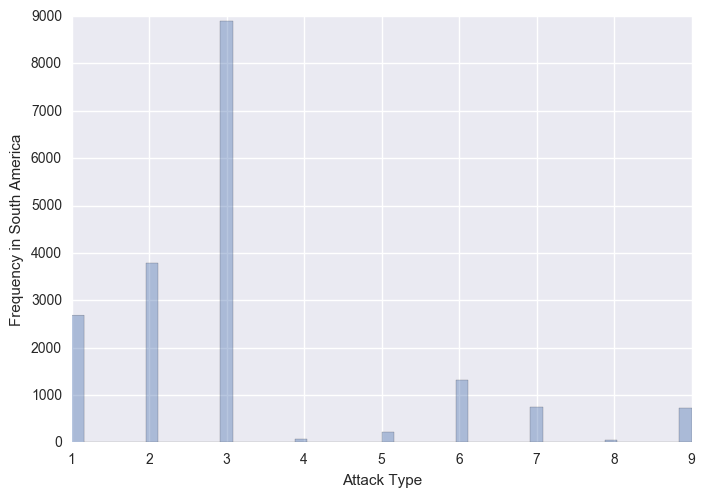

In [17]:
ax = sns.distplot(s_am_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency in South America')
plt.show()

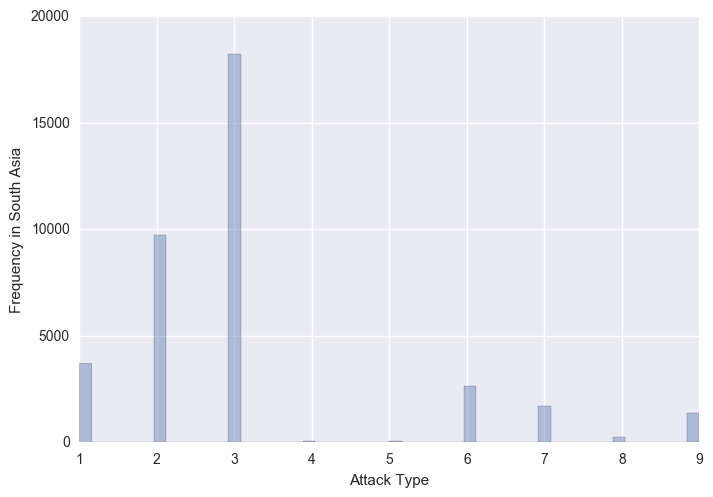

In [18]:
sa_attks = gtd[gtd.region_txt=='South Asia']
ax = sns.distplot(sa_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency in South Asia')
plt.show()

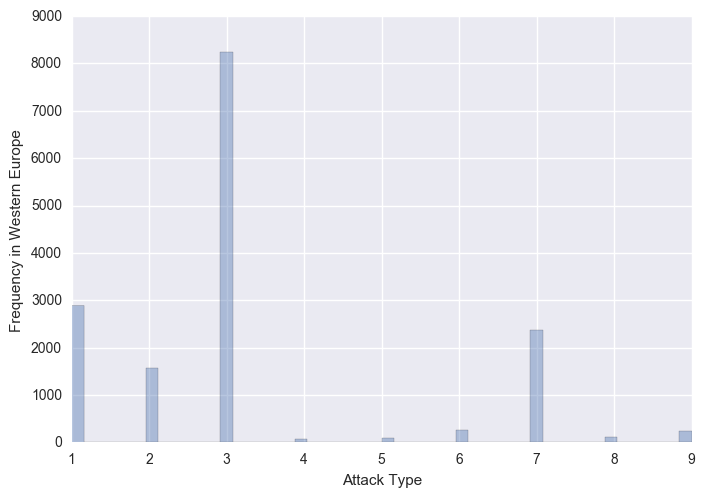

In [19]:
we_attks = gtd[gtd.region_txt=='Western Europe']
ax = sns.distplot(we_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency in Western Europe')
plt.show()

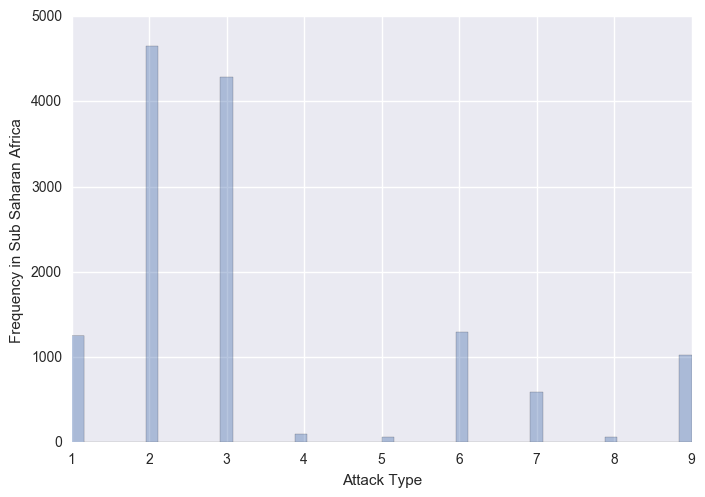

In [20]:
sub_af_attks = gtd[gtd.region_txt=='Sub-Saharan Africa']
ax = sns.distplot(sub_af_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency in Sub Saharan Africa')
plt.show()
#Only one two show higher armed assaults than bombings. 

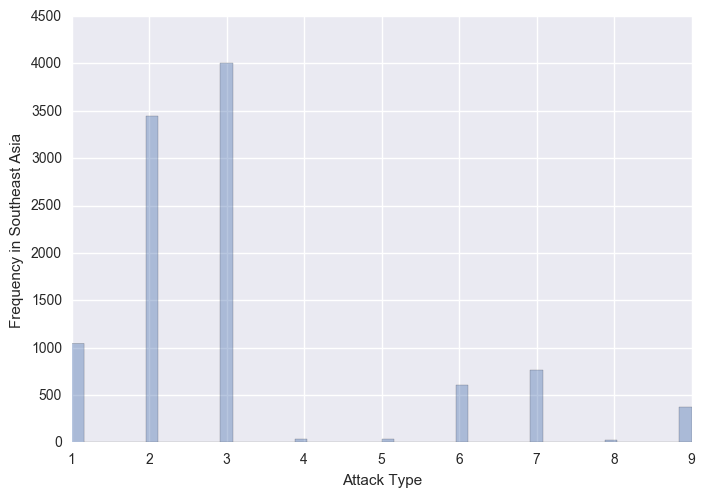

In [21]:
sea_attks = gtd[gtd.region_txt=='Southeast Asia']
ax = sns.distplot(sea_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency in Southeast Asia')
plt.show()

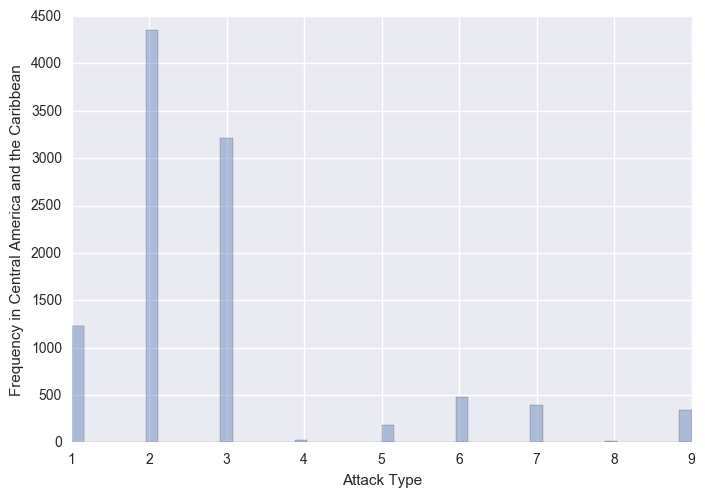

In [22]:
cac_attks = gtd[gtd.region_txt=='Central America & Caribbean']
ax = sns.distplot(cac_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency in Central America and the Caribbean')
plt.show()

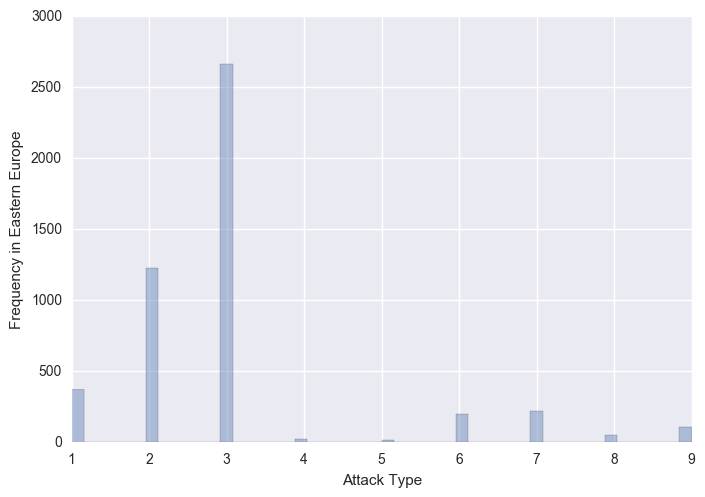

In [23]:
ee_attks = gtd[gtd.region_txt=='Eastern Europe']
ax = sns.distplot(ee_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency in Eastern Europe')
plt.show()

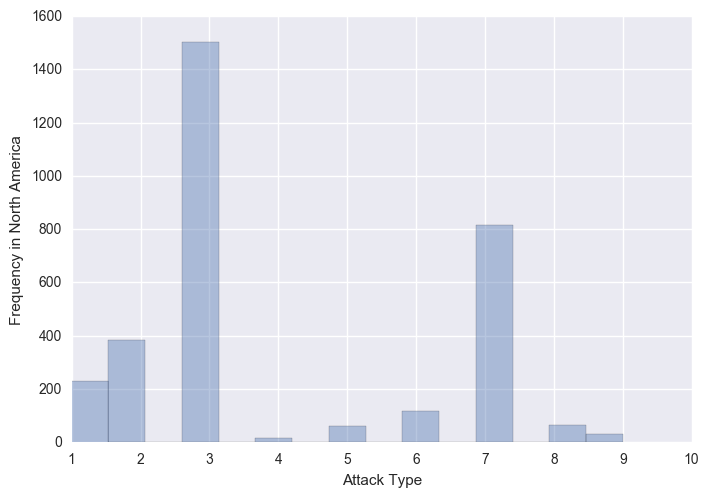

In [24]:
na_attks = gtd[gtd.region_txt=='North America']
ax = sns.distplot(na_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency in North America')
plt.show()

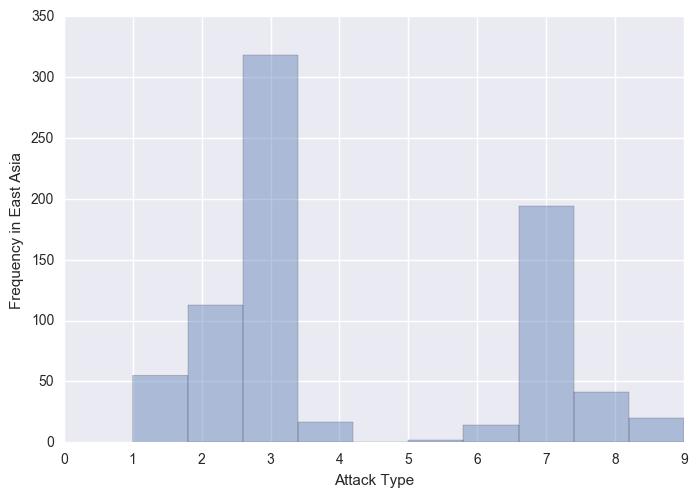

In [25]:
ea_attks = gtd[gtd.region_txt=='East Asia']
ax = sns.distplot(ea_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency in East Asia')
plt.show()

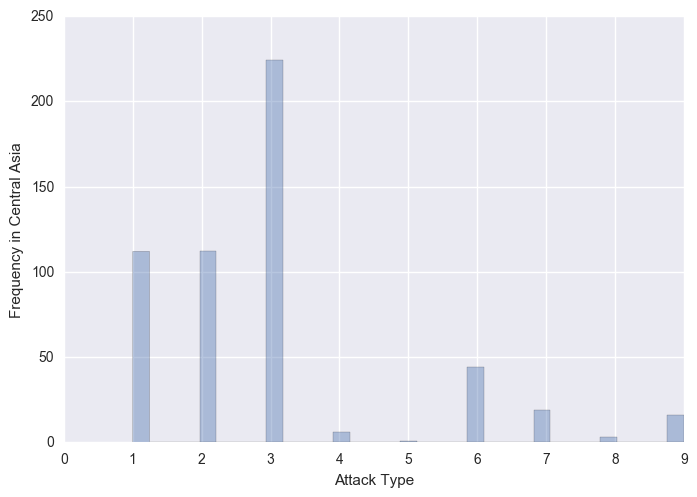

In [26]:
ca_attks = gtd[gtd.region_txt=='Central Asia']
ax = sns.distplot(ca_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency in Central Asia')
plt.show()

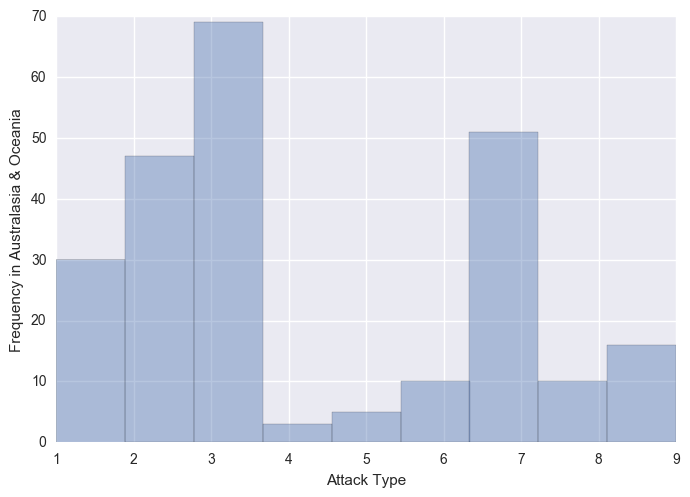

In [27]:
ao_attks = gtd[gtd.region_txt=='Australasia & Oceania']
ax = sns.distplot(ao_attks.attacktype1, kde=False, bins=9)
ax.set(xlabel='Attack Type', ylabel='Frequency in Australasia & Oceania')
plt.show()

In [28]:
# The most frequent attack across all regions is bombings, except for Sub-Saharan
# Africa and Central America/The Caribbean, where armed assualt is more relatively frequent. 
# In North America, Australia/Oceania, and Western Europe, facility/infrastructure attacks
# are more frequent than in other areas. This makes sense, as these regions are generally 
# more developed than others in terms of urban infrastructure. 

In [29]:
me_attks.groupby('attacktype1').year.count()

attacktype1
1     3863
2     8017
3    23992
4      118
5       79
6     2014
7      917
8      143
9     1122
Name: year, dtype: int64

In [30]:
me_attks['armed_assault'] = me_attks.apply(lambda x: 1 if x['attacktype1'] == 2 else 0, axis=1)
me_attks['bombings'] = me_attks.apply(lambda x: 1 if x['attacktype1'] == 3 else 0, axis=1)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [31]:
me_attks.head()

,year,month,day,approxdate,extended,resolution,country,country_txt,region,region_txt,...,nhostkid,nhostkidus,nhours,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,armed_assault,bombings
95,1970,2,28,NaN,0,NaN,102,Jordan,10,Middle East & North Africa,...,NaN,NaN,NaN,-9,-9,0,-9,NaN,1,0
133,1970,3,14,NaN,0,NaN,60,Egypt,10,Middle East & North Africa,...,NaN,NaN,NaN,-9,-9,0,-9,NaN,0,1
158,1970,3,29,NaN,0,NaN,110,Lebanon,10,Middle East & North Africa,...,NaN,NaN,NaN,0,1,1,1,NaN,0,1
195,1970,4,15,NaN,0,NaN,102,Jordan,10,Middle East & North Africa,...,NaN,NaN,NaN,0,1,1,1,NaN,0,1
226,1970,4,25,NaN,0,NaN,209,Turkey,10,Middle East & North Africa,...,NaN,NaN,NaN,1,0,1,1,NaN,0,1


In [32]:
me_attks_grouped_by_year = me_attks.groupby('year').sum()

In [33]:
me_attks_grouped_by_year = me_attks_grouped_by_year.reset_index()

In [34]:
me_attks_grouped_by_year.head()

,year,month,day,extended,country,region,latitude,longitude,specificity,vicinity,...,ishostkid,nhostkid,nhostkidus,nhours,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,armed_assault,bombings
0,1970,201,379,4,3873,260,938.066691,925.852406,26,0,...,6.0,67.0,2.0,22.0,-61,-49,21,3,3,14
1,1971,246,735,3,9250,520,1843.104989,1730.684872,67,0,...,7.0,-190.0,5.0,17.0,-170,-144,37,-33,6,35
2,1972,199,586,2,4245,340,1215.588295,1375.813205,34,0,...,7.0,-312.0,0.0,0.0,-215,-207,19,-87,2,22
3,1973,89,282,2,2057,190,647.383890,646.939773,22,0,...,2.0,-49.0,50.0,0.0,-50,-42,17,9,2,14
4,1974,292,666,3,5021,410,1374.053305,1657.122109,41,0,...,9.0,82.0,0.0,0.0,-106,-99,25,-21,3,26


In [35]:
me_bombs_1st_q = me_attks_grouped_by_year[me_attks_grouped_by_year.bombings <= 174]
me_bombs_4th_q = me_attks_grouped_by_year[me_attks_grouped_by_year.bombings >= 269]

In [36]:
me_bombs_1st_q.nkill.describe()

count      23.000000
mean      457.086957
std       382.865145
min         2.000000
25%        52.500000
50%       464.000000
75%       740.500000
max      1174.000000
Name: nkill, dtype: float64

In [37]:
me_attks_grouped_by_year.bombings.describe()

count      45.000000
mean      533.155556
std       951.323981
min        14.000000
25%       115.000000
50%       174.000000
75%       296.000000
max      4419.000000
Name: bombings, dtype: float64

In [38]:
me_aa_1st_q = me_attks_grouped_by_year[me_attks_grouped_by_year.armed_assault <= 35]
me_aa_4th_q = me_attks_grouped_by_year[me_attks_grouped_by_year.armed_assault >= 204]

In [39]:
me_attks_grouped_by_year.armed_assault.describe()

count      45.000000
mean      178.155556
std       253.939055
min         2.000000
25%        35.000000
50%        94.000000
75%       204.000000
max      1161.000000
Name: armed_assault, dtype: float64

In [40]:
plt.style.use('fivethirtyeight')

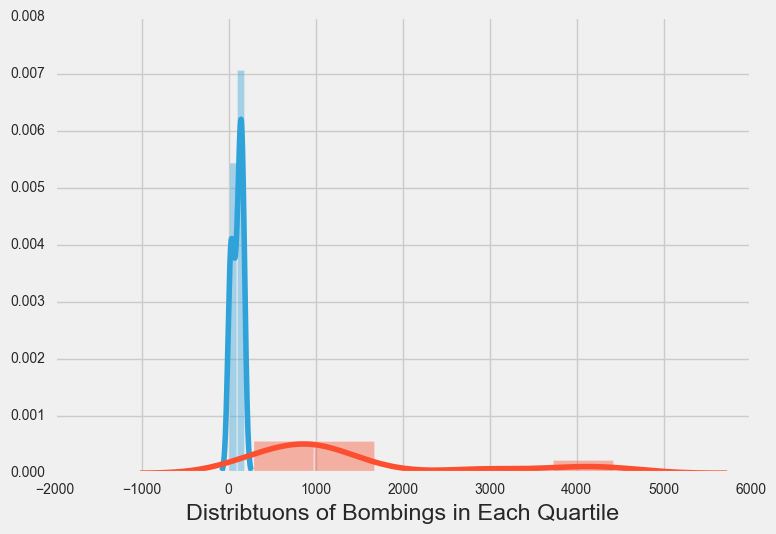

In [41]:
ax = sns.distplot(me_bombs_1st_q.bombings)
sns.distplot(me_bombs_4th_q.bombings)
ax.set(xlabel='Distribtuons of Bombings in Each Quartile')
plt.show()

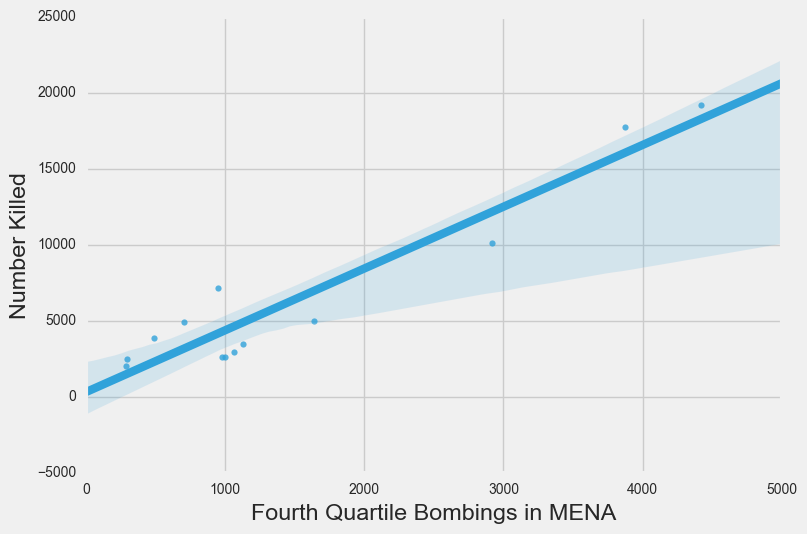

In [42]:
ax = sns.regplot(x=me_bombs_4th_q.bombings, y=me_bombs_4th_q.nkill, data=me_bombs_4th_q)
ax.set(xlabel='Fourth Quartile Bombings in MENA', ylabel='Number Killed')
plt.show()

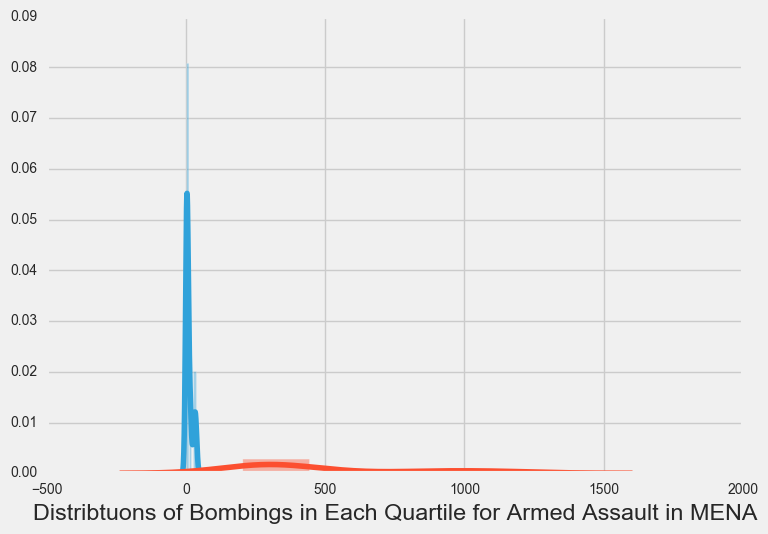

In [43]:
ax = sns.distplot(me_aa_1st_q.armed_assault)
sns.distplot(me_aa_4th_q.armed_assault)
ax.set(xlabel='Distribtuons of Bombings in Each Quartile for Armed Assault in MENA')
plt.show()

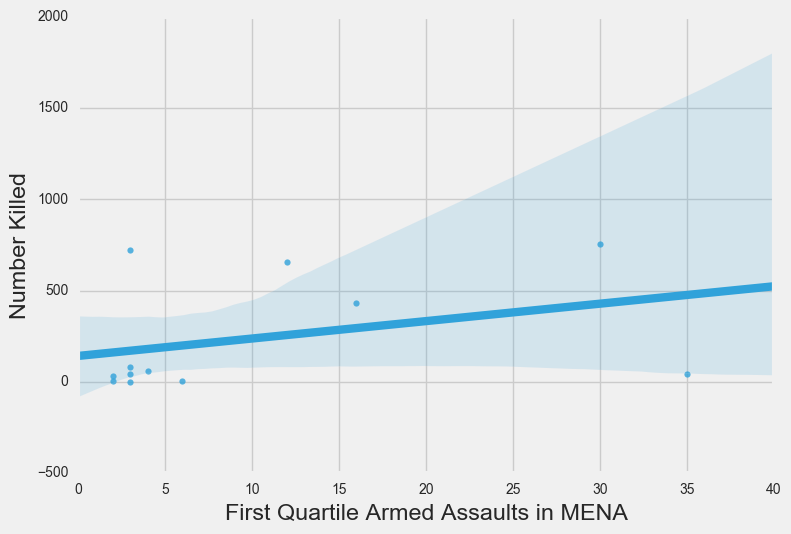

In [44]:
ax = sns.regplot(x=me_aa_1st_q.armed_assault, y=me_aa_1st_q.nkill, data=me_aa_1st_q)
ax.set(xlabel='First Quartile Armed Assaults in MENA', ylabel='Number Killed')
plt.show()

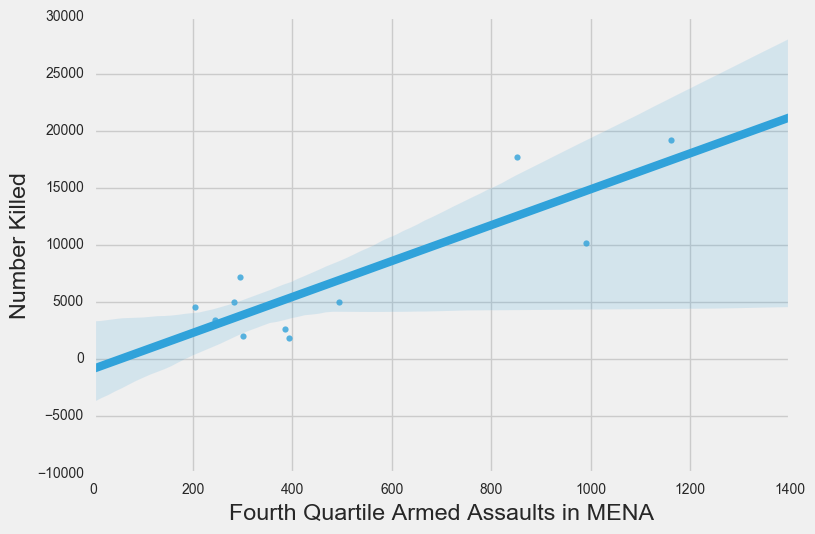

In [45]:
ax = sns.regplot(x=me_aa_4th_q.armed_assault, y=me_aa_4th_q.nkill, data=me_aa_4th_q)
ax.set(xlabel='Fourth Quartile Armed Assaults in MENA', ylabel='Number Killed')
plt.show()

In [48]:
ax = sns.regplot(x=sub_af_aa_4th_q.armed_assault, y=sub_af_aa_4th_q.nkill, data=sub_af_aa_4th_q)
ax.set(xlabel='Fourth Quartile Armed Assaults in Sub Saharan Africa', ylabel='Number Killed')
plt.show()

NameError: name 'sub_af_aa_4th_q' is not defined

In [49]:
sub_af_attks_grouped_by_year.armed_assault.describe()

AttributeError: 'DataFrame' object has no attribute 'armed_assault'

In [50]:
me_bombs_1st_q.columns

Index([         u'year',         u'month',           u'day',      u'extended',
             u'country',        u'region',      u'latitude',     u'longitude',
         u'specificity',      u'vicinity',         u'crit1',         u'crit2',
               u'crit3',     u'doubtterr',   u'alternative',      u'multiple',
             u'success',       u'suicide',   u'attacktype1',     u'targtype1',
        u'targsubtype1',       u'natlty1',       u'ingroup',   u'guncertain1',
         u'guncertain2',        u'nperps',      u'nperpcap',       u'claimed',
           u'claimmode',     u'weaptype1',  u'weapsubtype1',         u'nkill',
             u'nkillus',      u'nkillter',        u'nwound',      u'nwoundus',
            u'nwoundte',      u'property',    u'propextent',     u'ishostkid',
            u'nhostkid',    u'nhostkidus',        u'nhours',       u'INT_LOG',
            u'INT_IDEO',      u'INT_MISC',       u'INT_ANY', u'armed_assault',
            u'bombings'],
      dtype='object')

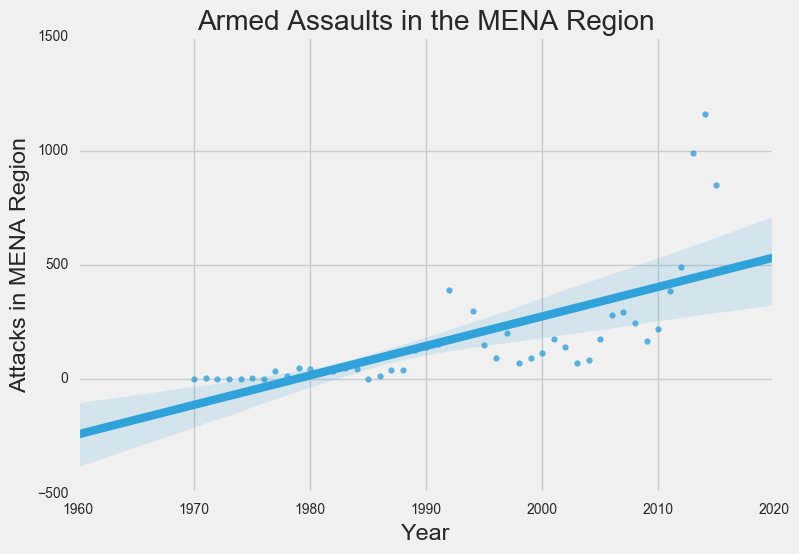

In [51]:
# Plotting armed assault across time in the Middle East and Sub-Saharan Africa: 
ax = sns.regplot(x=me_attks_grouped_by_year.year, y=me_attks_grouped_by_year.armed_assault, data=me_attks_grouped_by_year)
ax.set(xlabel='Year', ylabel='Attacks in MENA Region')
plt.title('Armed Assaults in the MENA Region')
plt.show()

In [52]:
sub_af_attks['armed_assault'] = sub_af_attks.apply(lambda x: 1 if x['attacktype1'] == 2 else 0, axis=1)
sub_af_attks['bombings'] = sub_af_attks.apply(lambda x: 1 if x['attacktype1'] == 3 else 0, axis=1)
sub_af_attks_grouped_by_year = sub_af_attks.groupby('year').sum()
sub_af_attks_grouped_by_year = sub_af_attks_grouped_by_year.reset_index()

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


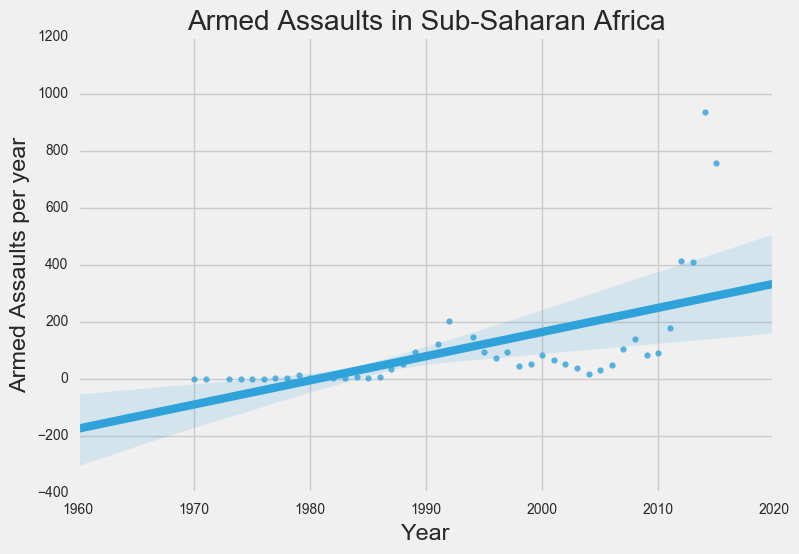

In [53]:
ax = sns.regplot(x=sub_af_attks_grouped_by_year.year, y=sub_af_attks_grouped_by_year.armed_assault, data=sub_af_attks_grouped_by_year)
ax.set(xlabel='Year', ylabel='Armed Assaults per year')
plt.title('Armed Assaults in Sub-Saharan Africa')
plt.show()

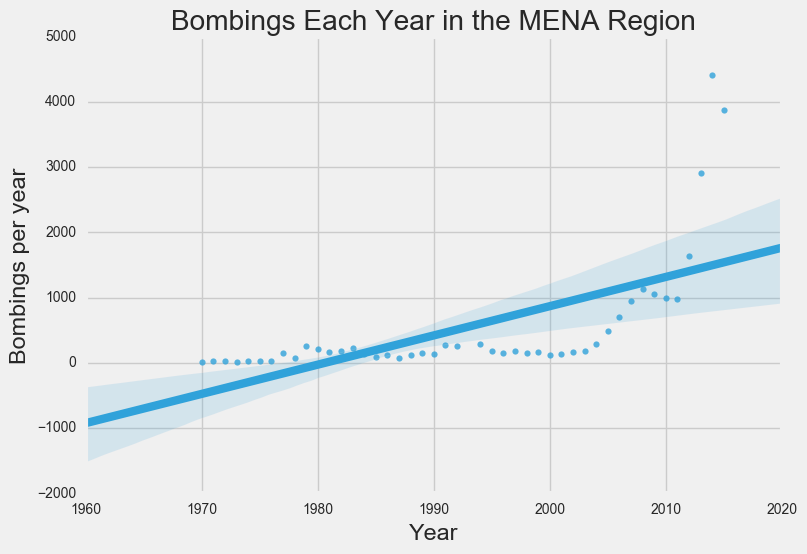

In [54]:
# Plotting bombings across years in the Middle East and Sub-Saharan Africa: 
ax = sns.regplot(x=me_attks_grouped_by_year.year, y=me_attks_grouped_by_year.bombings, data=me_attks_grouped_by_year)
ax.set(xlabel='Year', ylabel='Bombings per year')
plt.title('Bombings Each Year in the MENA Region')
plt.show()

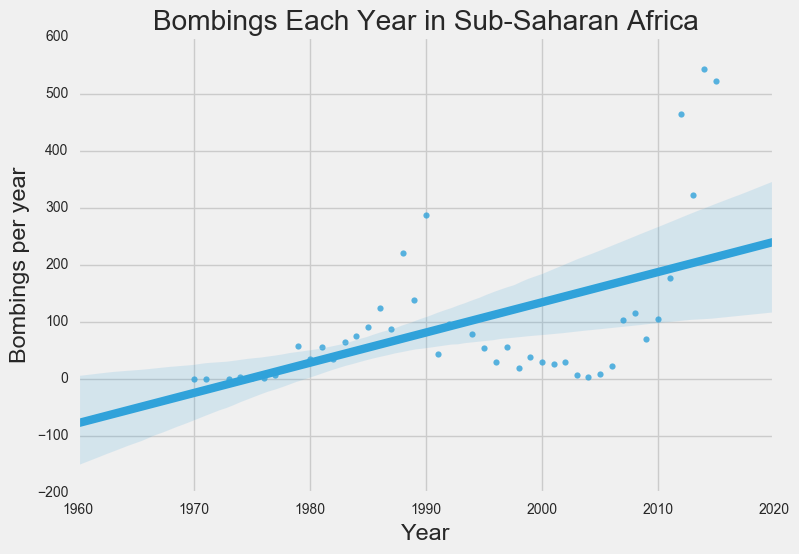

In [55]:
ax = sns.regplot(x=sub_af_attks_grouped_by_year.year, y=sub_af_attks_grouped_by_year.bombings, data=sub_af_attks_grouped_by_year)
ax.set(xlabel='Year', ylabel='Bombings per year')
plt.title('Bombings Each Year in Sub-Saharan Africa')
plt.show()

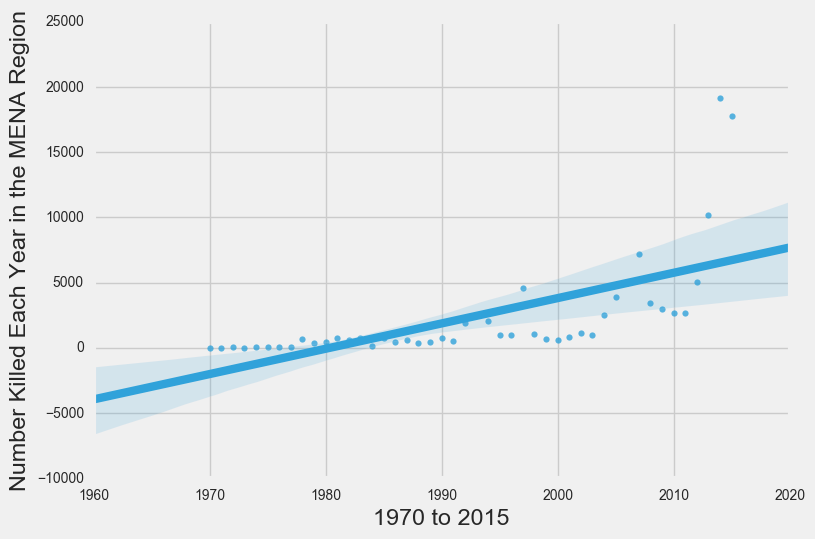

In [56]:
# Plotting Number killed in each region.
ax = sns.regplot(x=me_attks_grouped_by_year.year, y=me_attks_grouped_by_year.nkill, data=me_attks_grouped_by_year)
ax.set(xlabel='1970 to 2015', ylabel='Number Killed Each Year in the MENA Region')
plt.show()

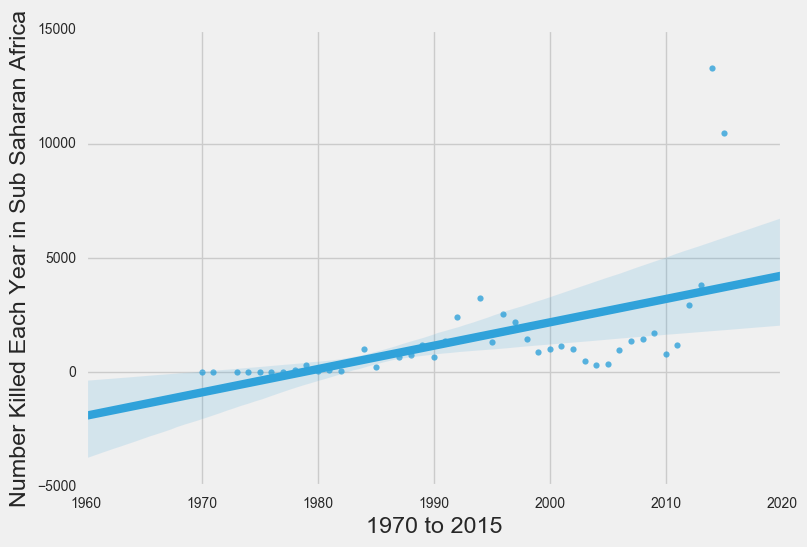

In [57]:
ax = sns.regplot(x=sub_af_attks_grouped_by_year.year, y=sub_af_attks_grouped_by_year.nkill, data=sub_af_attks_grouped_by_year)
ax.set(xlabel='1970 to 2015', ylabel='Number Killed Each Year in Sub Saharan Africa')
plt.show()

In [58]:
#gtd['date'] = pd.to_datetime((gtd.year*10000+gtd_ts.month*100+gtd.day).apply(str),format='%Y%m%d')

In [59]:
gtd.country_txt.value_counts()

Iraq                              18750
Pakistan                          12731
India                              9911
Afghanistan                        9677
Colombia                           8003
Peru                               6048
Philippines                        5542
El Salvador                        5277
United Kingdom                     4965
Turkey                             3532
Thailand                           3329
Spain                              3202
Sri Lanka                          2955
Nigeria                            2888
Somalia                            2872
Algeria                            2689
United States                      2660
Yemen                              2596
France                             2544
Lebanon                            2388
Chile                              2325
Russia                             2100
Israel                             2077
Guatemala                          2023
West Bank and Gaza Strip           1984


In [ ]:
#Let's compare the top five in Sub-Saharan Africa and top five in the Middle East. 

In [60]:
sub_af_attks.country_txt.value_counts().head()

Nigeria         2888
Somalia         2872
South Africa    1950
Sudan            683
Kenya            515
Name: country_txt, dtype: int64

In [61]:
me_attks.country_txt.value_counts().head()

Iraq       18750
Turkey      3532
Algeria     2689
Yemen       2596
Lebanon     2388
Name: country_txt, dtype: int64

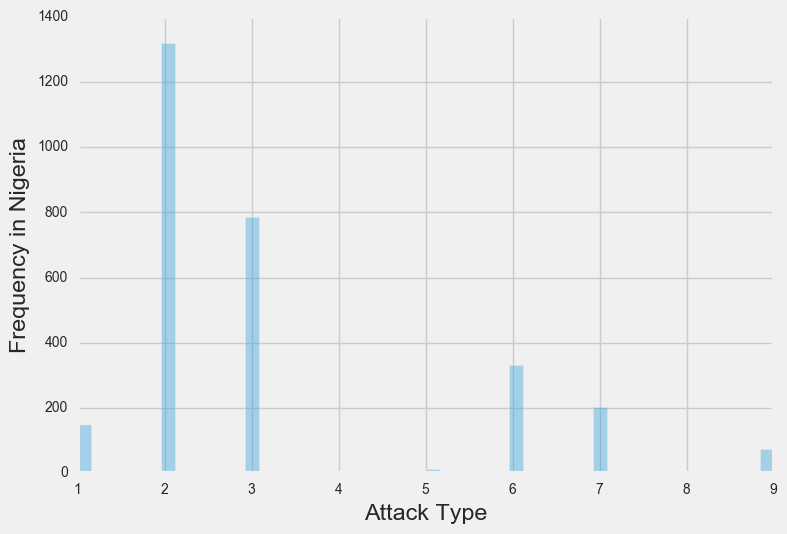

In [62]:
nigeria_attks = sub_af_attks[sub_af_attks.country_txt=='Nigeria']
ax = sns.distplot(nigeria_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency in Nigeria')
plt.show()

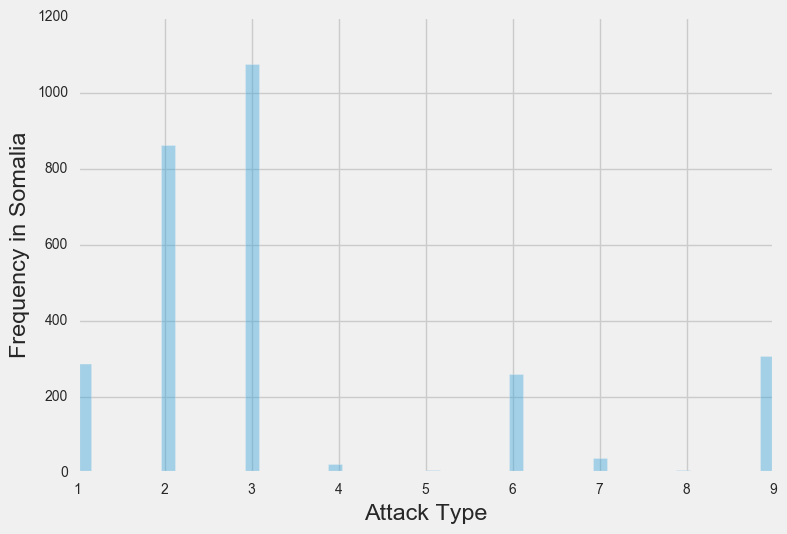

In [63]:
somalia_attks = sub_af_attks[sub_af_attks.country_txt=='Somalia']
ax = sns.distplot(somalia_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency in Somalia')
plt.show()
# Much higher frequency of bombings in Somalia than in Nigeria. 

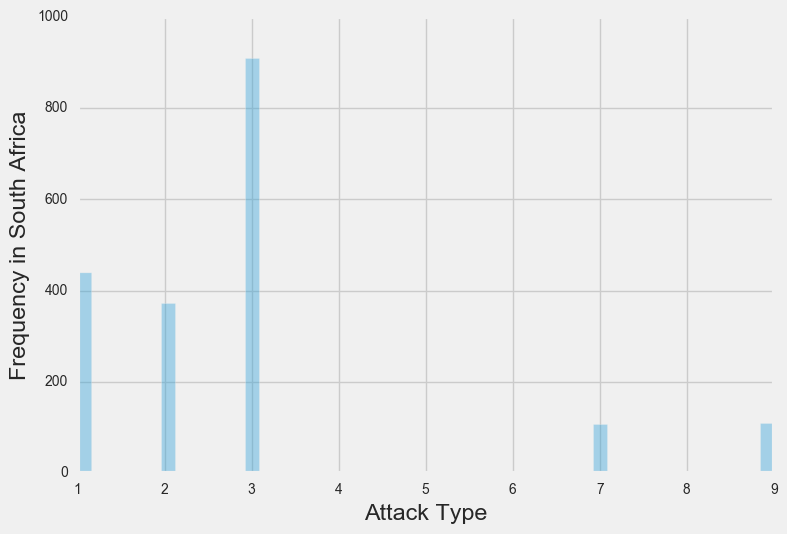

In [64]:
s_af_attks = sub_af_attks[sub_af_attks.country_txt=='South Africa']
ax = sns.distplot(s_af_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency in South Africa')
plt.show()

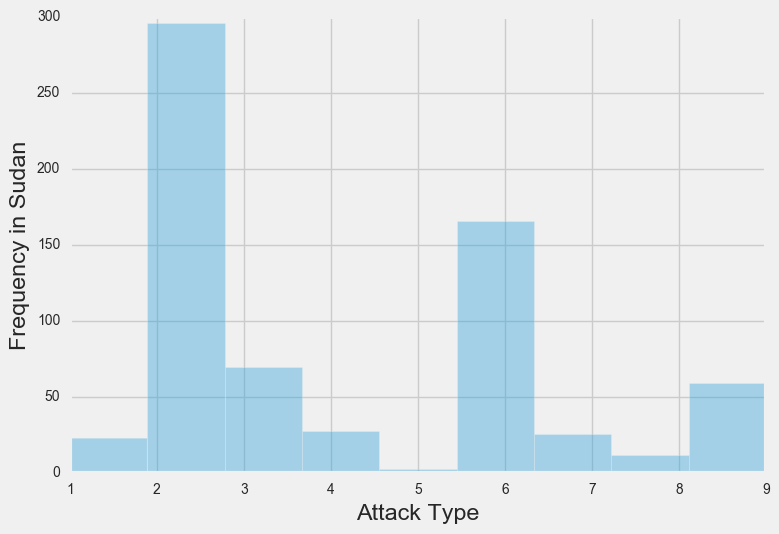

In [65]:
sudan_attks = sub_af_attks[sub_af_attks.country_txt=='Sudan']
ax = sns.distplot(sudan_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency in Sudan')
plt.show()

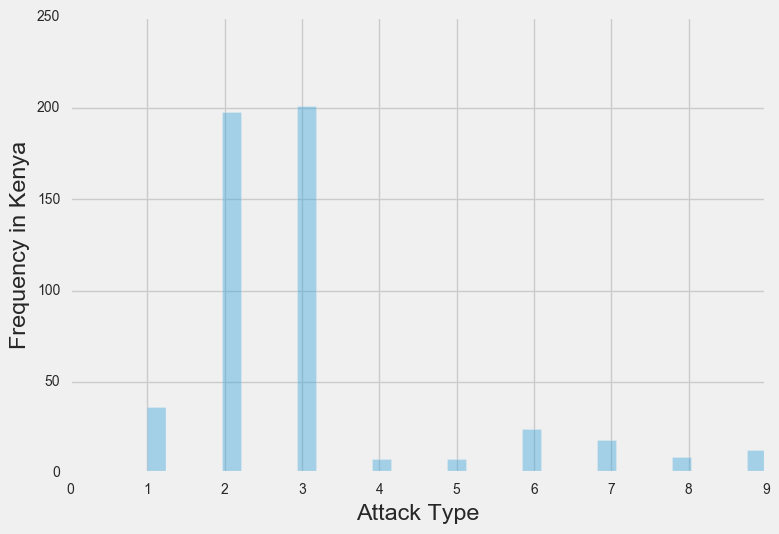

In [66]:
kenya_attks = sub_af_attks[sub_af_attks.country_txt=='Kenya']
ax = sns.distplot(kenya_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency in Kenya')
plt.show()
# Relatively equal bombings and armed assault. 

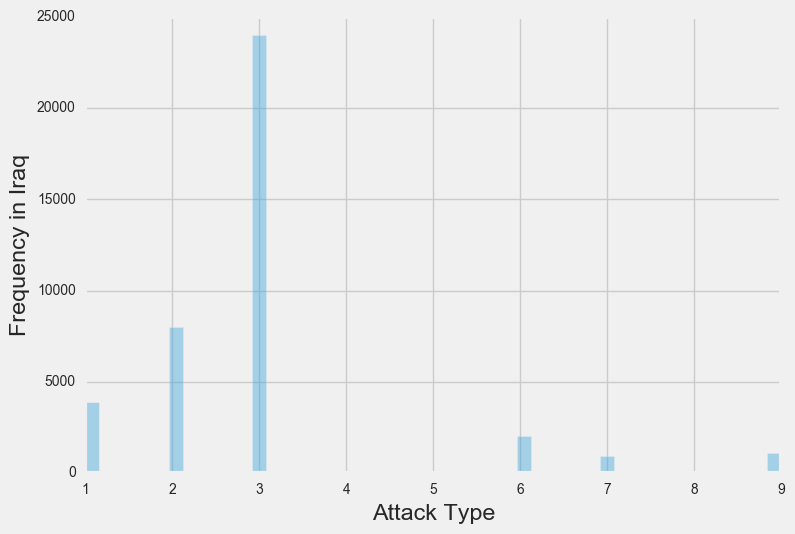

In [67]:
iraq_attks = me_attks[me_attks.country_txt=='Iraq']
ax = sns.distplot(me_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency in Iraq')
plt.show()

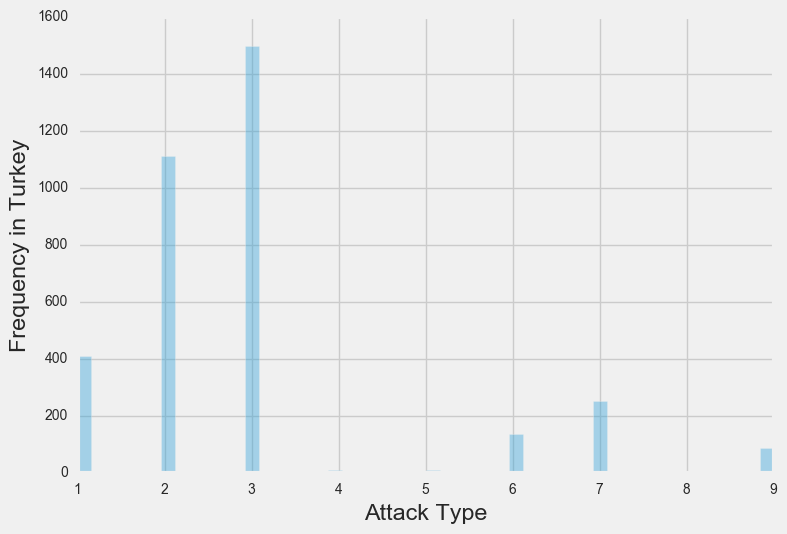

In [68]:
turkey_attks = me_attks[me_attks.country_txt=='Turkey']
ax = sns.distplot(turkey_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency in Turkey')
plt.show()

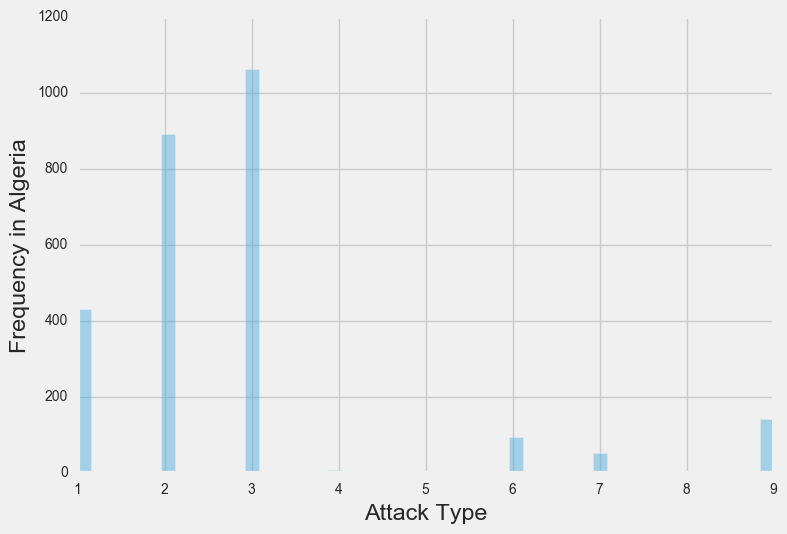

In [69]:
algeria_attks = me_attks[me_attks.country_txt=='Algeria']
ax = sns.distplot(algeria_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency in Algeria')
plt.show()

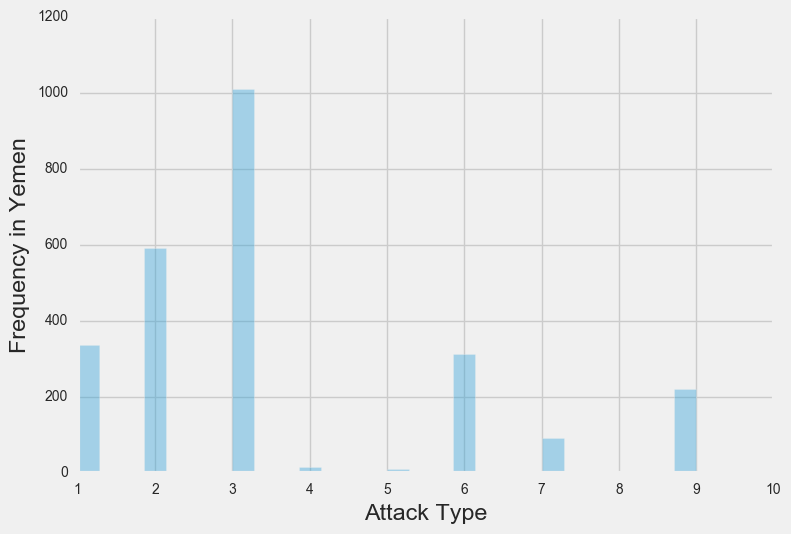

In [70]:
yemen_attks = me_attks[me_attks.country_txt=='Yemen']
ax = sns.distplot(yemen_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency in Yemen')
plt.show()

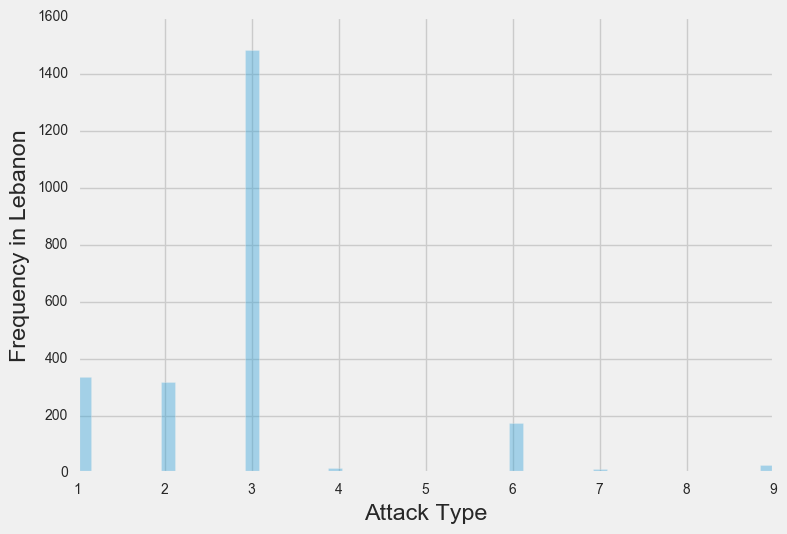

In [71]:
leb_attks = me_attks[me_attks.country_txt=='Lebanon']
ax = sns.distplot(leb_attks.attacktype1, kde=False)
ax.set(xlabel='Attack Type', ylabel='Frequency in Lebanon')
plt.show()

## Part 2: Bayesian Inference

In [72]:
# compare two populations. 
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pymc3 as pm

In [73]:
sub_af_attks['armed_assault'] = sub_af_attks.apply(lambda x: 1 if x['attacktype1'] == 2 else 0, axis=1)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [74]:
#Comparing populations in Somalia and Nigeria in the 2010s. 
sub_af_00s = sub_af_attks[sub_af_attks.year > 2001]

In [75]:
#Comparing populations in Somalia and Nigeria in the 2010s. 
sub_af_00s = sub_af_attks[sub_af_attks.year > 2001]
sub_af_00s = sub_af_00s[sub_af_00s.year < 2011] 

In [76]:
nig_00s = sub_af_00s[sub_af_00s.country_txt == 'Nigeria']
som_00s = sub_af_00s[sub_af_00s.country_txt == 'Somalia']

In [77]:
nig_00s

,year,month,day,approxdate,extended,resolution,country,country_txt,region,region_txt,...,nhostkid,nhostkidus,nhours,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,armed_assault,bombings
73505,2002,1,2,NaN,0,NaN,147,Nigeria,11,Sub-Saharan Africa,...,NaN,NaN,NaN,-9,-9,0,-9,NaN,1,0
74430,2002,8,16,NaN,0,NaN,147,Nigeria,11,Sub-Saharan Africa,...,NaN,NaN,NaN,-9,-9,0,-9,NaN,0,0
74541,2002,9,22,NaN,0,NaN,147,Nigeria,11,Sub-Saharan Africa,...,NaN,NaN,NaN,-9,-9,0,-9,NaN,0,0
74656,2002,11,2,NaN,0,NaN,147,Nigeria,11,Sub-Saharan Africa,...,NaN,NaN,NaN,-9,-9,0,-9,NaN,1,0
74700,2002,11,15,NaN,0,NaN,147,Nigeria,11,Sub-Saharan Africa,...,NaN,NaN,NaN,-9,-9,0,-9,NaN,0,1
74782,2002,12,13,NaN,0,NaN,147,Nigeria,11,Sub-Saharan Africa,...,NaN,NaN,NaN,-9,-9,0,-9,NaN,1,0
75018,2003,2,2,NaN,0,NaN,147,Nigeria,11,Sub-Saharan Africa,...,NaN,NaN,NaN,-9,-9,0,-9,NaN,0,1
75042,2003,2,8,NaN,0,NaN,147,Nigeria,11,Sub-Saharan Africa,...,NaN,NaN,NaN,-9,-9,0,-9,NaN,0,0
75335,2003,4,8,NaN,0,NaN,147,Nigeria,11,Sub-Saharan Africa,...,NaN,NaN,NaN,-9,-9,1,1,NaN,0,1
75361,2003,4,14,NaN,0,NaN,147,Nigeria,11,Sub-Saharan Africa,...,NaN,NaN,NaN,-9,-9,0,-9,NaN,1,0


In [78]:
nig_00s.columns

Index([            u'year',            u'month',              u'day',
             u'approxdate',         u'extended',       u'resolution',
                u'country',      u'country_txt',           u'region',
             u'region_txt',        u'provstate',             u'city',
               u'latitude',        u'longitude',      u'specificity',
               u'vicinity',         u'location',            u'crit1',
                  u'crit2',            u'crit3',        u'doubtterr',
            u'alternative',         u'multiple',          u'success',
                u'suicide',      u'attacktype1',  u'attacktype1_txt',
              u'targtype1',    u'targtype1_txt',     u'targsubtype1',
       u'targsubtype1_txt',            u'corp1',          u'target1',
                u'natlty1',      u'natlty1_txt',            u'gname',
                u'ingroup',           u'motive',      u'guncertain1',
            u'guncertain2',           u'nperps',         u'nperpcap',
                u'cl

In [79]:
nig_00s = nig_00s[[0,1,2,4,8,12,13,17,18,19,66]]

In [80]:
som_00s = som_00s[[0,1,2,4,8,12,13,17,18,19,66]]

In [81]:
mean_prior_mean = sub_af_00s.armed_assault.mean()
mean_prior_std = sub_af_00s.armed_assault.std()

In [82]:
with pm.Model() as model:

    nig_mean = pm.Normal('Nigeria Armed Assaults Mean', mean_prior_mean, sd=mean_prior_std)
    som_mean = pm.Normal('Somalia Armed Assaults Mean', mean_prior_mean, sd=mean_prior_std)

In [83]:
std_prior_lower = 0.01
std_prior_upper = 100.0

with model:
    
    nig_std = pm.Uniform('Nigeria Armed Assaults Std', lower=std_prior_lower, upper=std_prior_upper)
    som_std = pm.Uniform('Somalia Armed Assaults Std', lower=std_prior_lower, upper=std_prior_upper)

In [84]:
with model:

    nigeria_group = pm.Normal('Nigeria Armed Assaults', mu=nig_mean, sd=nig_std, observed=nig_00s)
    som_group = pm.Normal('Somalia Armed Assaults', mu=som_mean, sd=som_std, observed=som_00s)

In [85]:
with model:

    diff_of_means = pm.Deterministic('difference of means', nig_mean - som_mean)
    diff_of_stds = pm.Deterministic('difference of stds', nig_std - som_std)
    effect_size = pm.Deterministic('effect size',
                                   diff_of_means / np.sqrt((nig_std**2 + som_std**2) / 2))

In [103]:
with model:
    trace = pm.sample(10000, njobs=-1)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -2.3629e+05: 100%|██████████| 200000/200000 [01:00<00:00, 3305.46it/s]
Finished [100%]: Average ELBO = -2.3629e+05
100%|██████████| 10000/10000 [01:08<00:00, 145.78it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11efdfcd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1213ae250>], dtype=object)

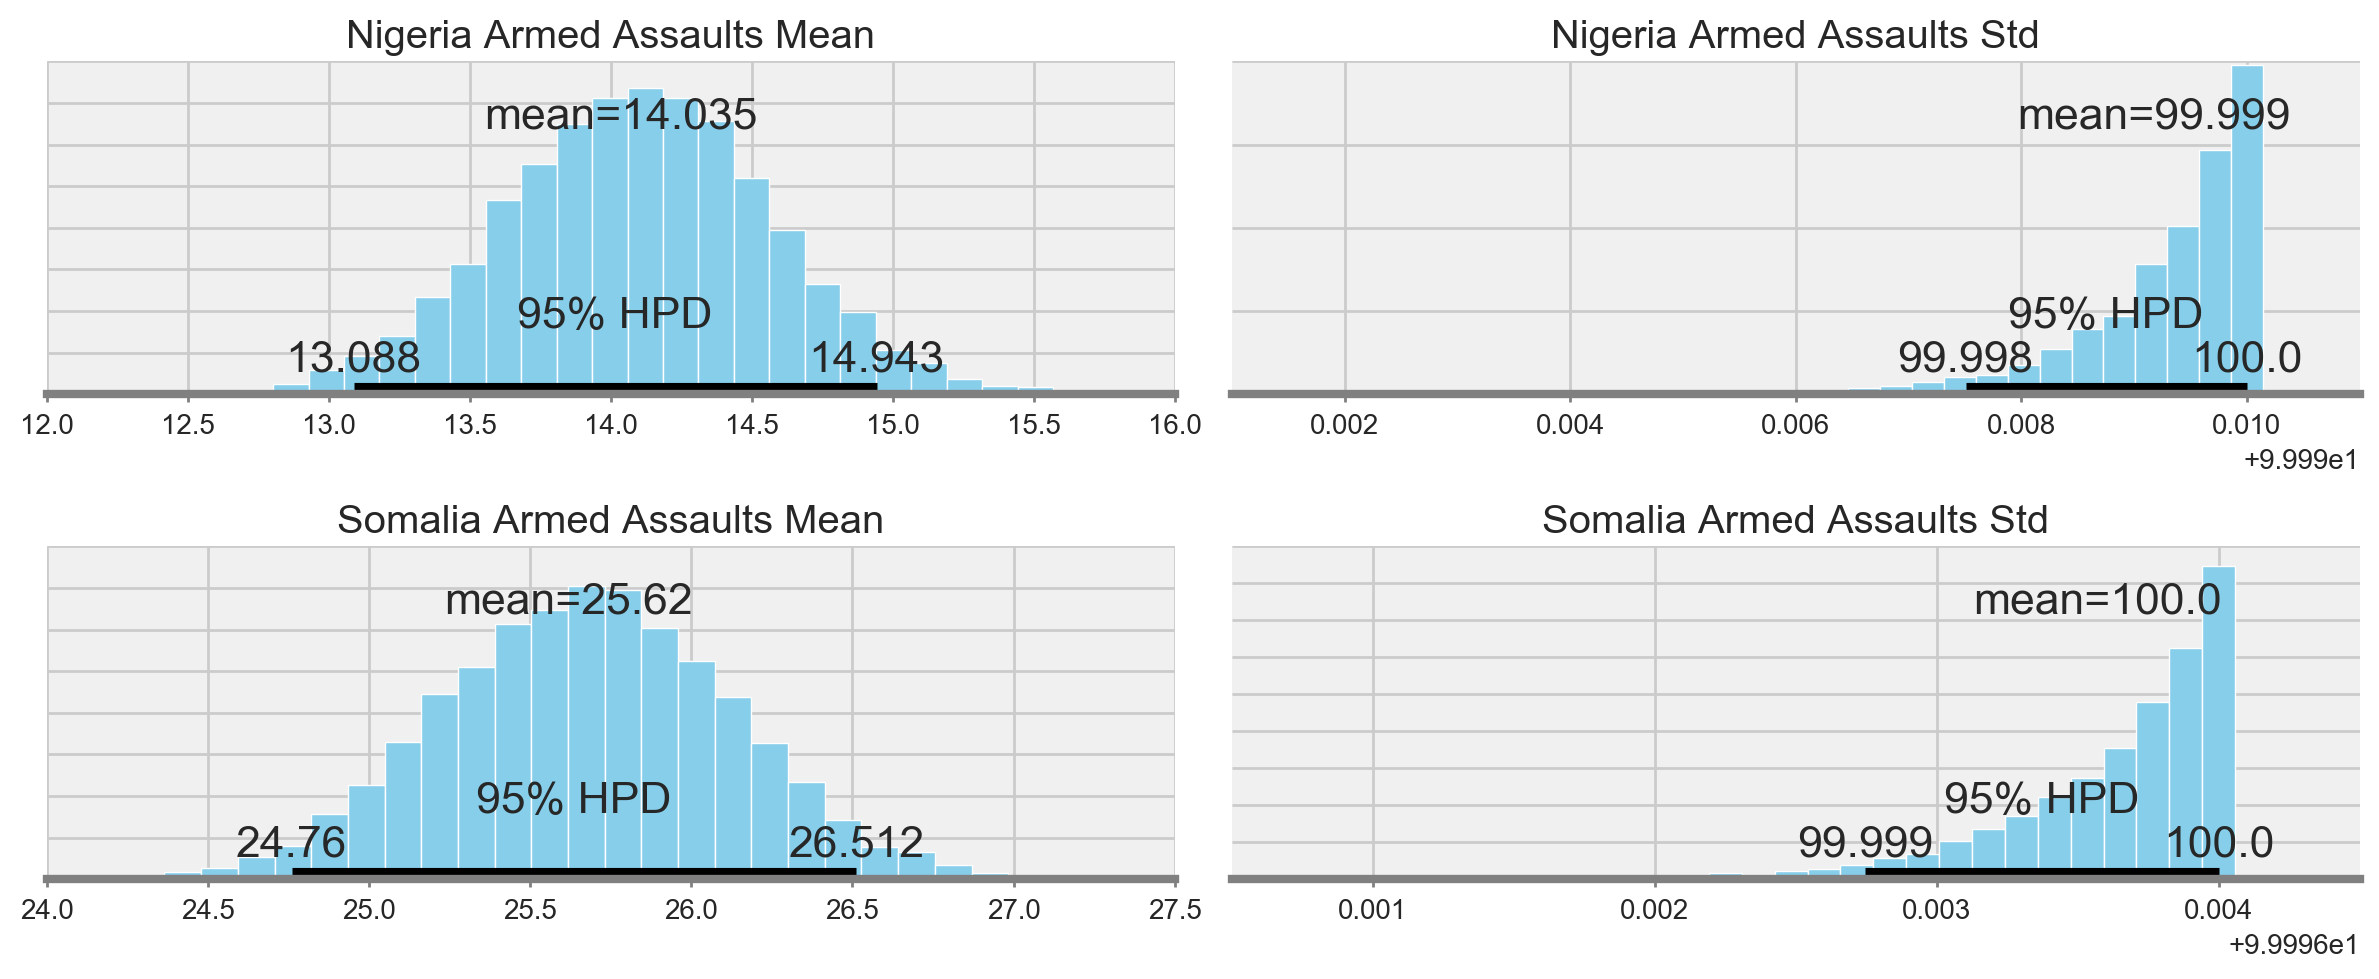

In [104]:
pm.plot_posterior(trace[3000:],
                  varnames=['Nigeria Armed Assaults Mean', 'Somalia Armed Assaults Mean', 'Nigeria Armed Assaults Std', 'Somalia Armed Assaults Std'],
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ef03850>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11fabef90>], dtype=object)

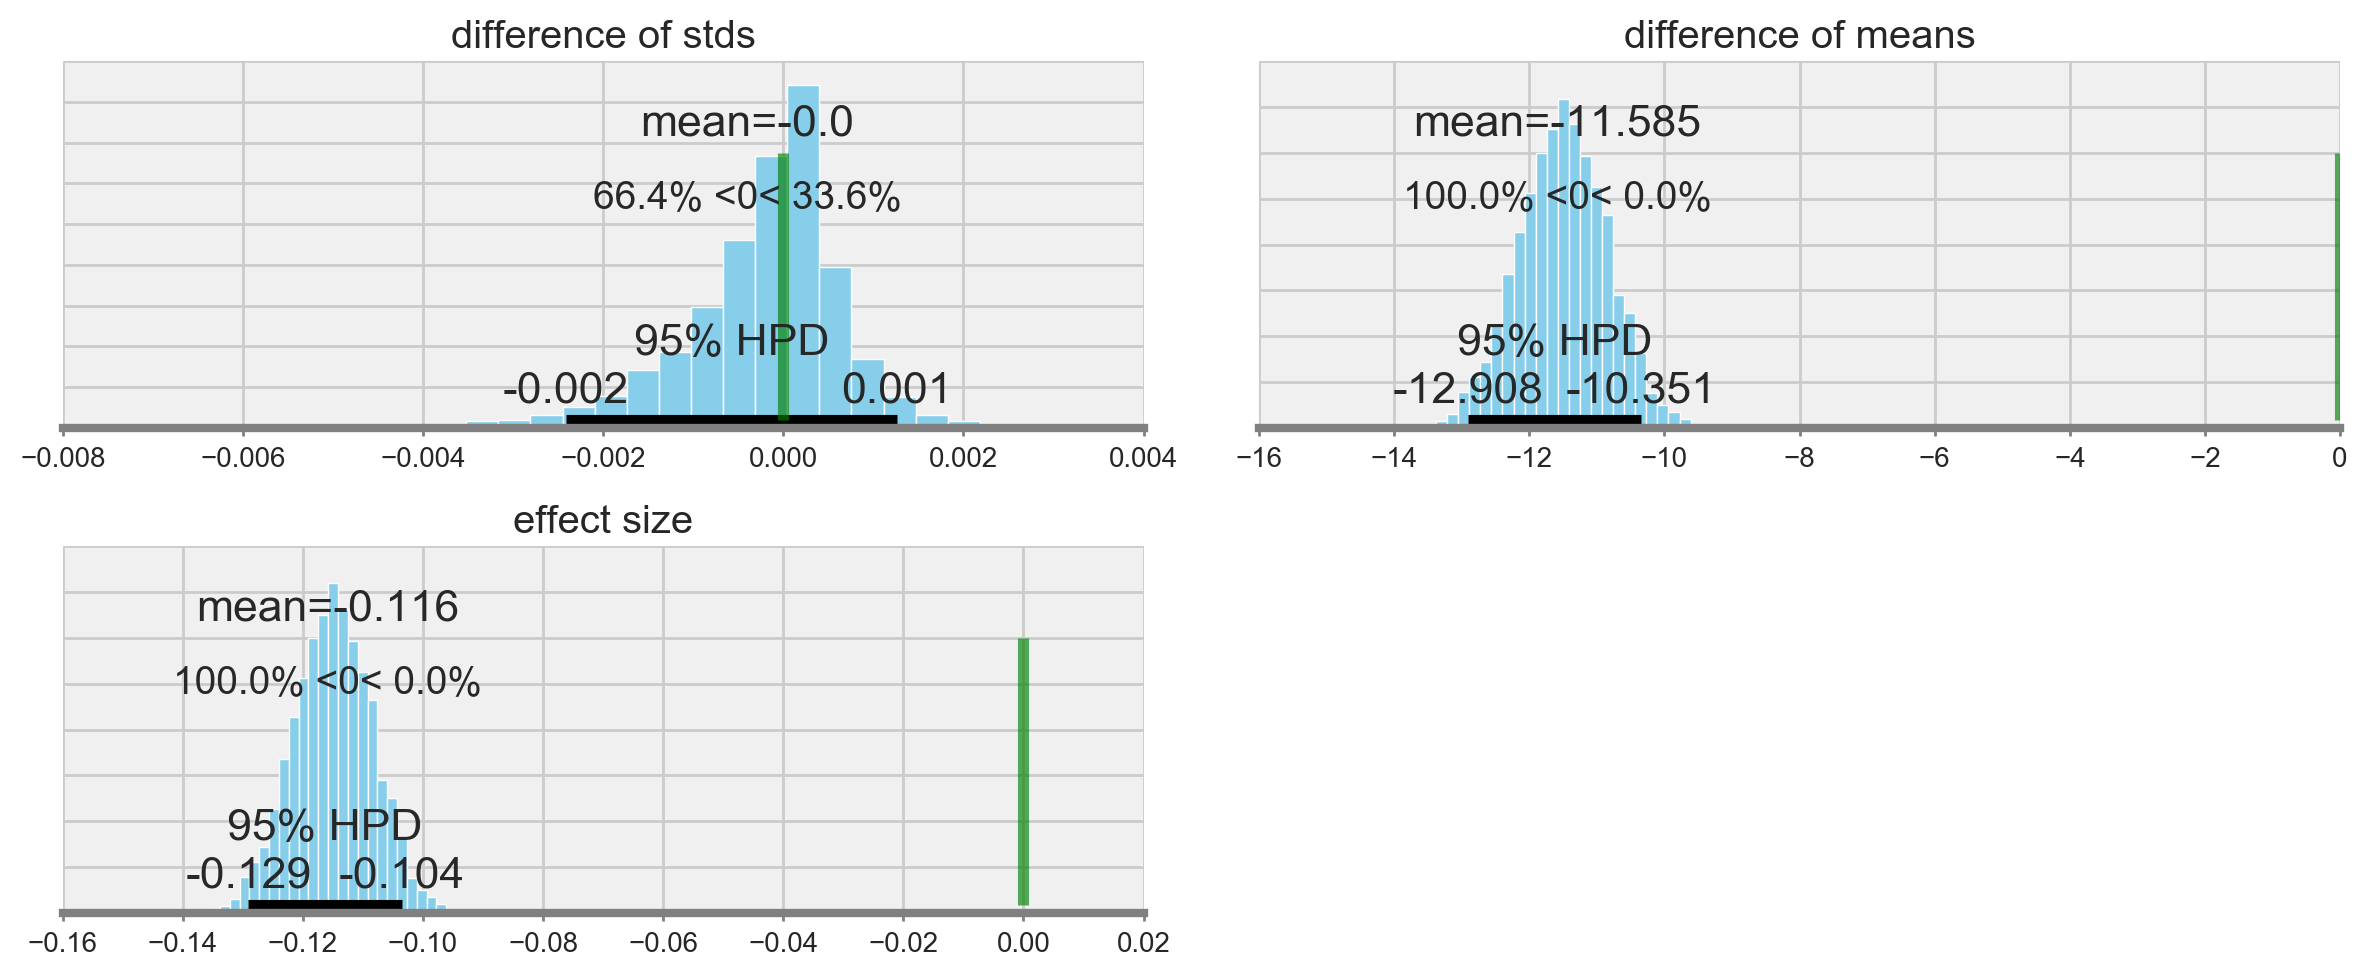

In [105]:
pm.plot_posterior(trace[3000:],
                  varnames=['difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

In [107]:
pm.summary(trace[3000:],
           varnames=['difference of means', 'difference of stds', 'effect size'])


difference of means:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -11.585          0.659            0.005            [-12.908, -10.351]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -12.888        -12.030        -11.586        -11.128        -10.324


difference of stds:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.000           0.001            0.000            [-0.002, 0.001]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.003         -0.001         -0.000         0.000          0.001


effect size:

  Mean             SD               MC Error         95% 

## Part 3: 1993

In [108]:
#Drop the 73 null values for lat and long.

In [109]:
# Predicting for 1993. Might be best to look at the years before and after.
me_attks_b4 = me_attks[me_attks.year == 1992]
me_attks_aftr = me_attks[me_attks.year == 1994]
sub_af_attks_b4 = sub_af_attks[sub_af_attks.year == 1992]
sub_af_attks_aftr = sub_af_attks[sub_af_attks.year == 1994]

In [110]:
sub_af_attks_b4.head()

,year,month,day,approxdate,extended,resolution,country,country_txt,region,region_txt,...,nhostkid,nhostkidus,nhours,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,armed_assault,bombings
49575,1992,1,1,NaN,0,NaN,183,South Africa,11,Sub-Saharan Africa,...,NaN,NaN,NaN,-9,-9,0,-9,NaN,0,1
49579,1992,1,2,NaN,0,NaN,183,South Africa,11,Sub-Saharan Africa,...,NaN,NaN,NaN,0,0,0,0,NaN,0,0
49585,1992,1,2,NaN,0,NaN,183,South Africa,11,Sub-Saharan Africa,...,NaN,NaN,NaN,-9,-9,0,-9,NaN,0,1
49586,1992,1,2,NaN,0,NaN,183,South Africa,11,Sub-Saharan Africa,...,NaN,NaN,NaN,-9,-9,0,-9,NaN,0,1
49589,1992,1,2,NaN,0,NaN,183,South Africa,11,Sub-Saharan Africa,...,NaN,NaN,NaN,-9,-9,0,-9,NaN,1,0


In [111]:
sub_af_attks_aftr.head()

,year,month,day,approxdate,extended,resolution,country,country_txt,region,region_txt,...,nhostkid,nhostkidus,nhours,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,armed_assault,bombings
54647,1994,1,1,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,...,NaN,NaN,NaN,-9,-9,1,1,NaN,1,0
54648,1994,1,1,NaN,0,NaN,183,South Africa,11,Sub-Saharan Africa,...,NaN,NaN,NaN,-9,-9,0,-9,NaN,0,1
54673,1994,1,2,NaN,0,NaN,42,Chad,11,Sub-Saharan Africa,...,NaN,NaN,NaN,-9,-9,1,1,NaN,0,1
54680,1994,1,3,NaN,0,NaN,37,Cameroon,11,Sub-Saharan Africa,...,NaN,NaN,NaN,-9,-9,0,-9,NaN,0,1
54682,1994,1,3,NaN,0,NaN,84,Guinea,11,Sub-Saharan Africa,...,NaN,NaN,NaN,1,1,0,1,NaN,1,0


In [112]:
bombs_per_month_1 = sub_af_attks_b4.groupby('month').bombings.count()

In [113]:
bombs_per_month_2 = sub_af_attks_aftr.groupby('month').bombings.count()

In [114]:
bombs_per_month_93 = np.mean(np.array([bombs_per_month_1, bombs_per_month_2]), axis=0 )

In [115]:
bombs_per_month_93 = pd.DataFrame(bombs_per_month_93)

In [116]:
bombs_per_month_93

,0
0,36.5
1,52.0
2,76.5
3,70.0
4,43.0
5,30.0
6,29.0
7,37.5
8,28.5
9,34.0


In [117]:
bombs_per_country_1 = sub_af_attks_b4.groupby('country_txt').bombings.count()

In [118]:
bombs_per_country_2 = sub_af_attks_aftr.groupby('country_txt').bombings.count()

In [119]:
bombs_per_country_1 = pd.DataFrame(bombs_per_country_1)

In [120]:
bombs_per_country_2 = pd.DataFrame(bombs_per_country_2)

In [121]:
bombs_per_county_93 = pd.concat((bombs_per_country_1, bombs_per_country_2))
bombs_per_county_93.groupby(bombs_per_county_93.index).mean()

,bombings
country_txt,
Angola,25.0
Benin,2.0
Burundi,9.0
Cameroon,6.0
Central African Republic,1.0
Chad,2.5
Comoros,1.0
Djibouti,4.0
Equatorial Guinea,1.0
